In [1]:
from SNE_Calculations.calculations import *
from Helpers.header import *
from Helpers.print_help import *

In [2]:
def q_joint(Y):
    """Given low-dimensional representations Y, compute
    matrix of joint probabilities with entries q_ij."""
    # Get the distances from every point to every other
    distances = neg_squared_euc_dists(Y)
    # Take the elementwise exponent
    exp_distances = np.exp(distances)
    # Fill diagonal with zeroes so q_ii = 0
    np.fill_diagonal(exp_distances, 0.)
    # Divide by the sum of the entire exponentiated matrix
    return exp_distances / np.sum(exp_distances), None

In [3]:
def symmetric_sne_grad(P, Q, Y, _):
    """Estimate the gradient of the cost with respect to Y"""
    pq_diff = P - Q  # NxN matrix
    pq_expanded = np.expand_dims(pq_diff, 2)  #NxNx1
    y_diffs = np.expand_dims(Y, 1) - np.expand_dims(Y, 0)  #NxNx2
    grad = 4. * (pq_expanded * y_diffs).sum(1)  #Nx2
    return grad

In [4]:
TSNE = False                # If False, Symmetric SNE

def main():
    # numpy RandomState for reproducibility
    rng = np.random.RandomState(SEED)

    
    X, y = load_from_csv('Datasets/mnist_test.csv')

    # Obtain matrix of joint probabilities p_ij
    P = p_joint(X, PERPLEXITY)

    # Fit SNE or t-SNE
    Y = estimate_sne(X, y, P, rng,
             num_iters=NUM_ITERS,
             q_fn=q_joint,
             grad_fn=symmetric_sne_grad,
             learning_rate=LEARNING_RATE,
             momentum=MOMENTUM,
             plot=NUM_PLOTS,
             title='Symmetric SNE')

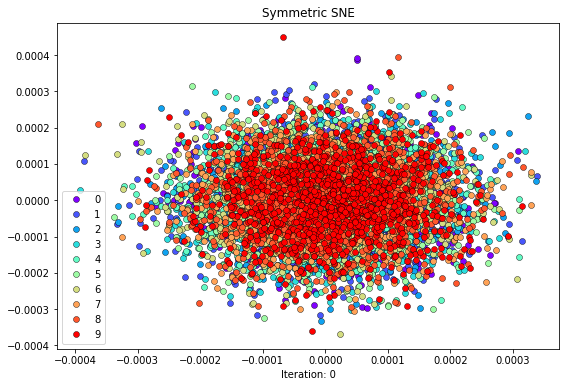

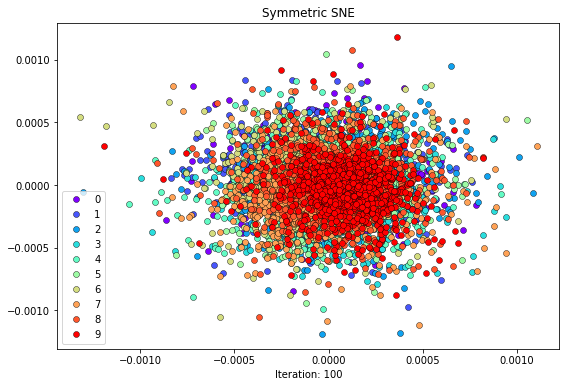

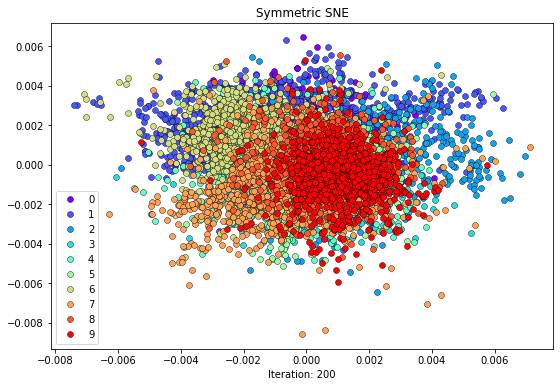

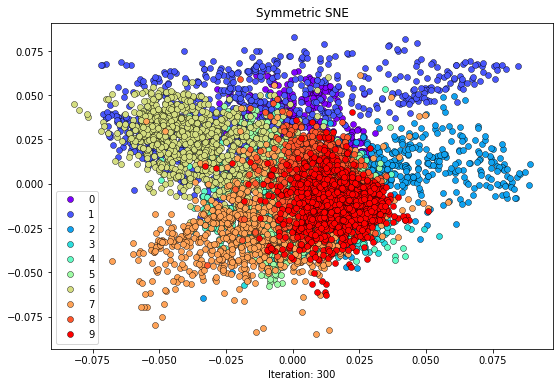

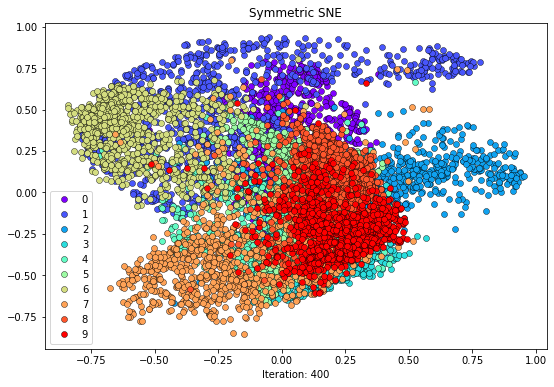

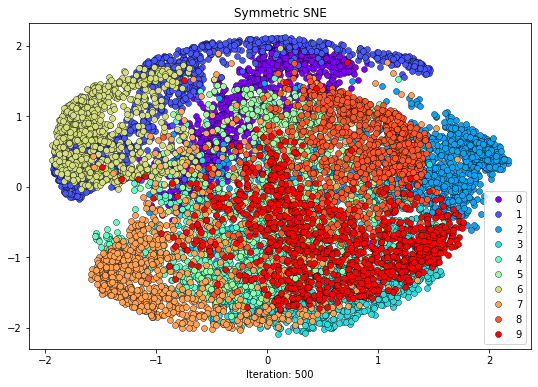

In [5]:
main()